# Dijkstras Annulus Coreset
This code is used to demonstrate the coreset method on some simple datasets. 

In [1]:
import timeit
import numpy as np
import matplotlib.pyplot as plt

import graphlearning as gl
import graphlearning.active_learning as al

import batch_active_learning as bal

## Separated Blobs
Demonstrates the DAC algorithm when it needs to randomly jump. 

In [2]:
num_points = 300
X = np.random.uniform(size=(2 * num_points, 2))
X[num_points:, 0] += 2
labels = np.zeros(2 * num_points, dtype=int)

In [3]:
W = gl.weightmatrix.knn(X,10)
G = gl.graph(W)
train_ind = []

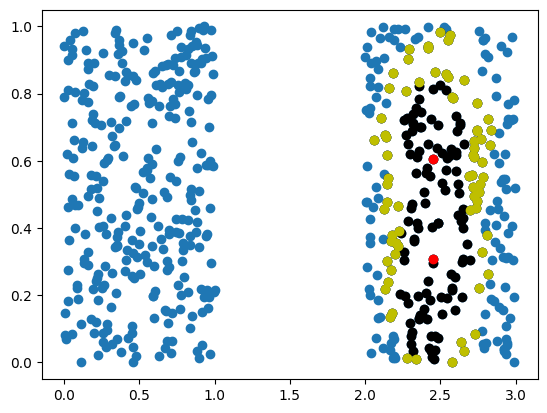

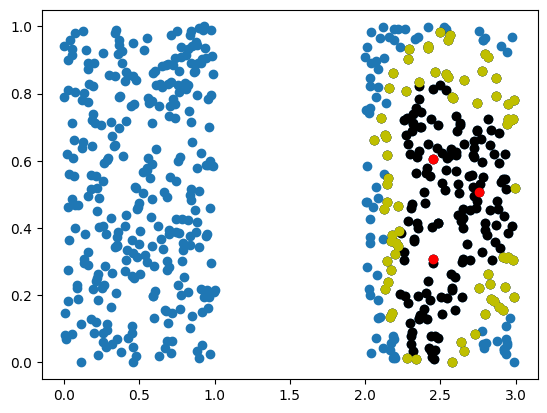

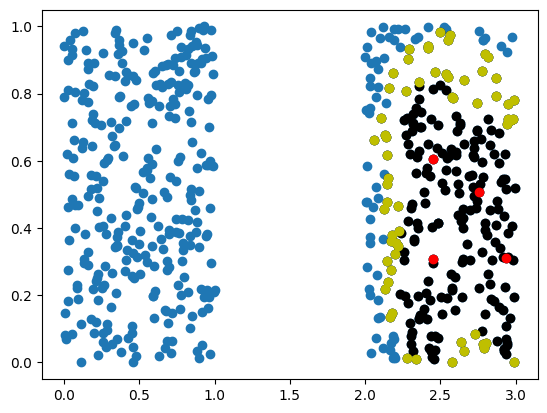

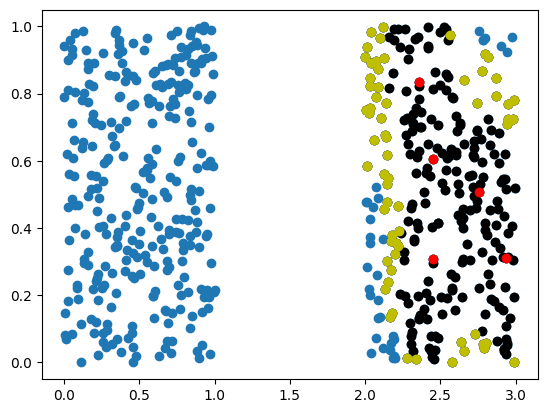

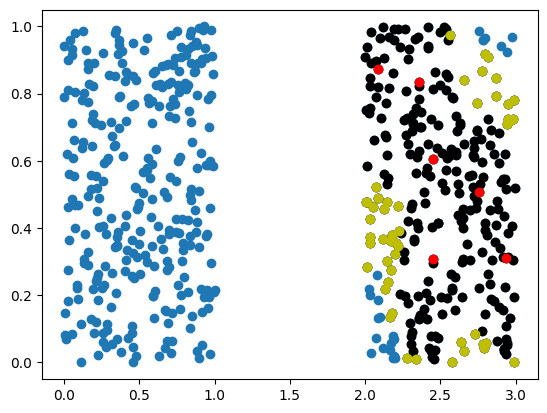

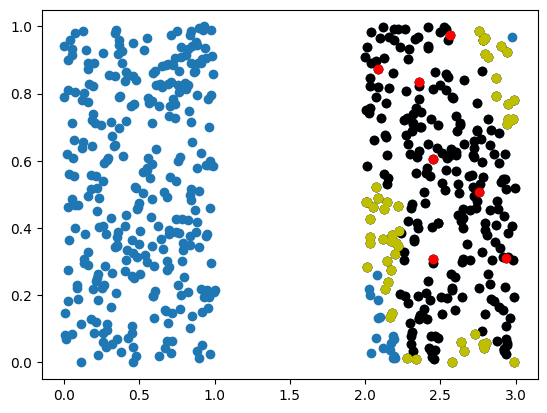

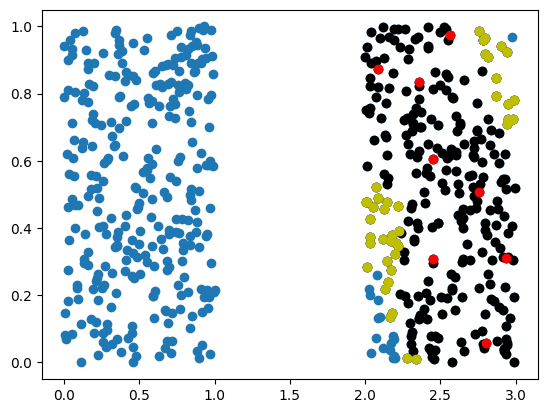

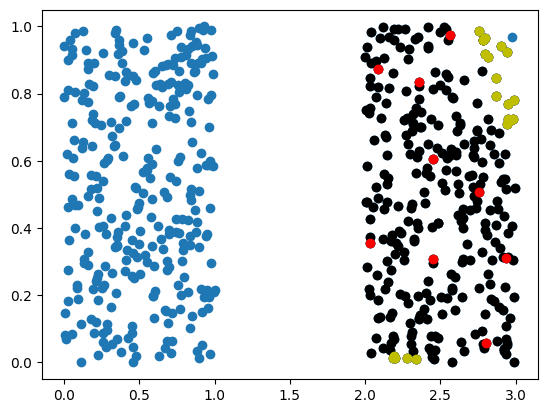

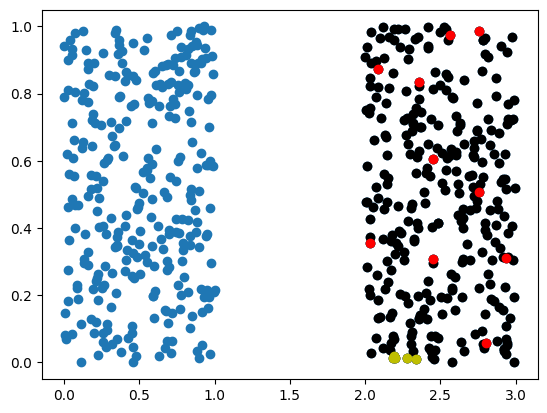

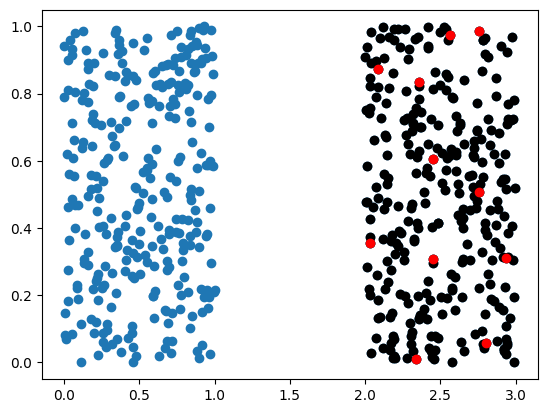

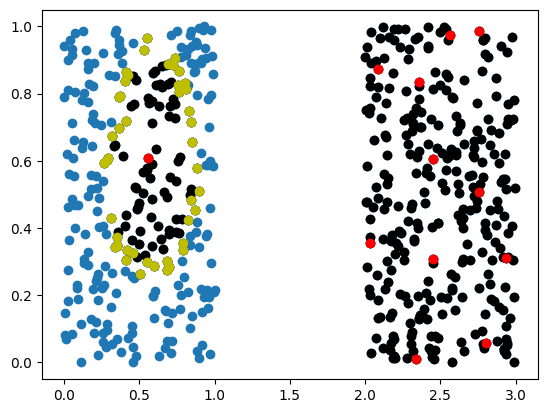

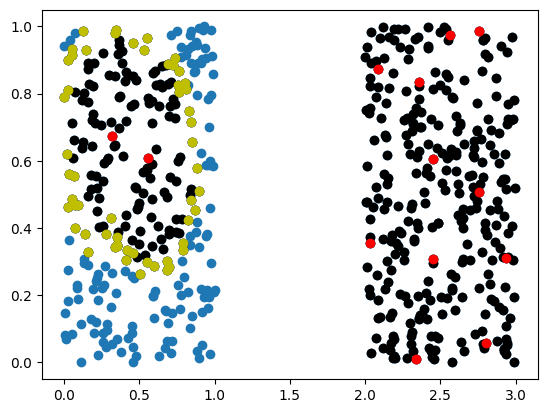

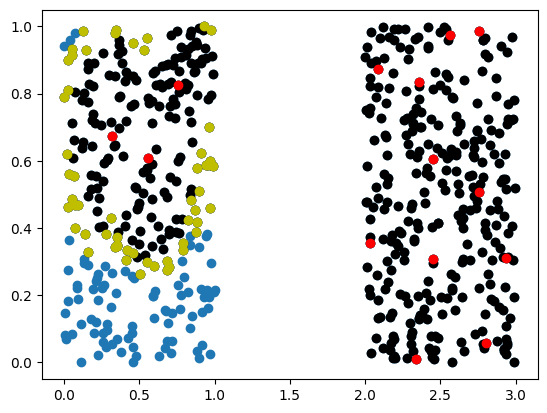

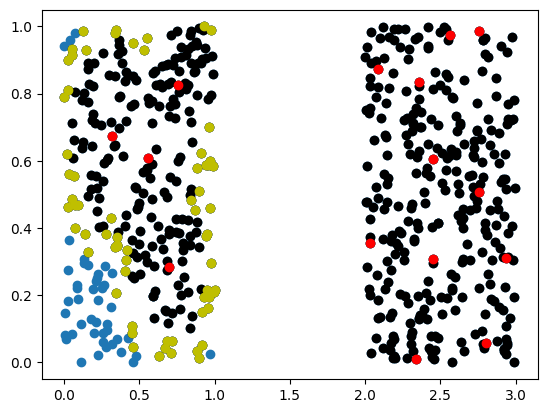

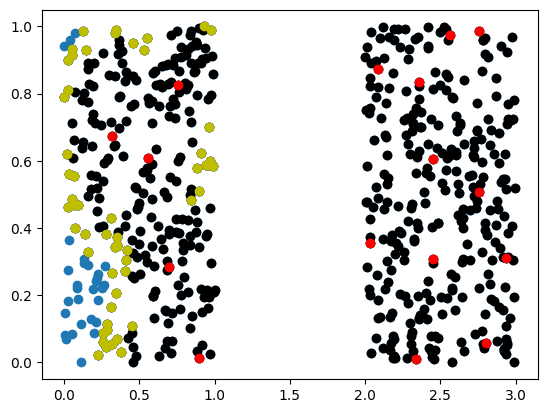

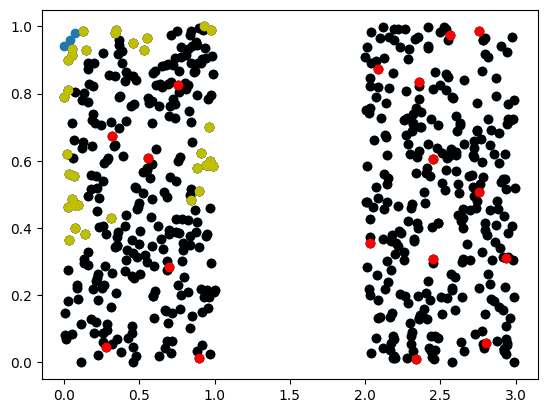

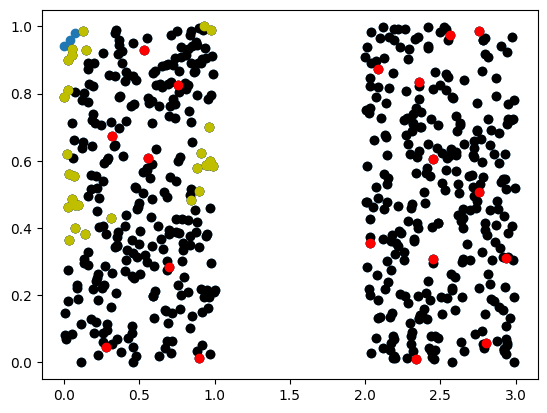

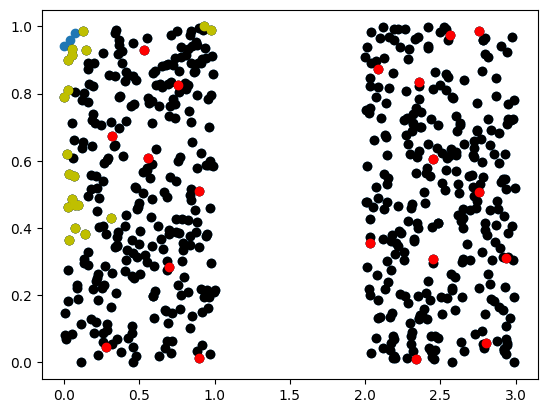

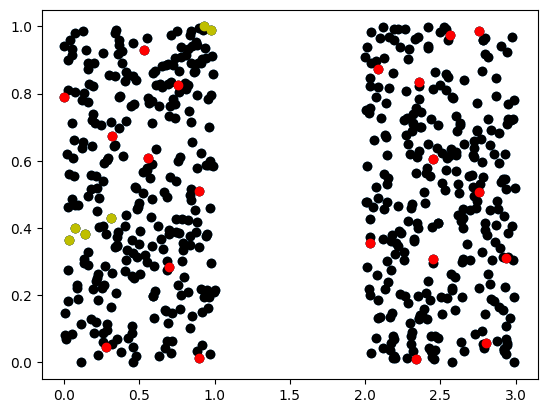

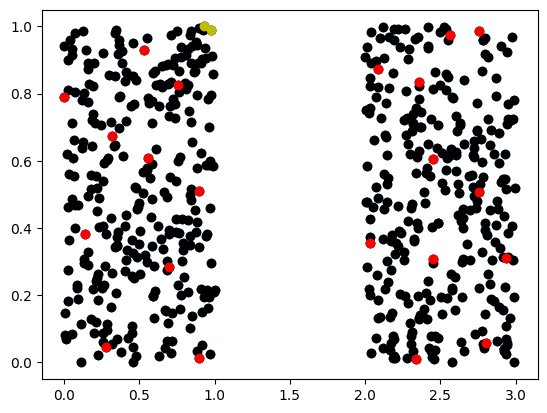

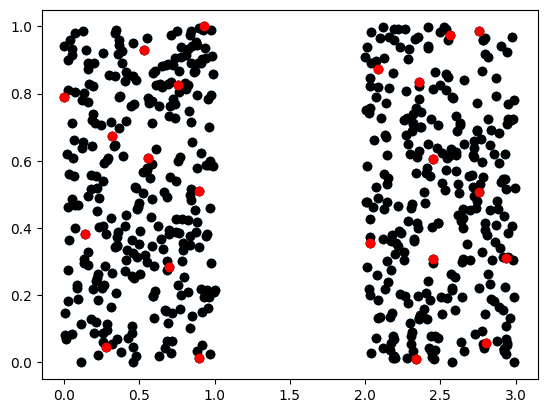

Coreset =  [510, 584, 419, 396, 501, 384, 534, 354, 440, 415, 598, 253, 242, 293, 220, 62, 299, 116, 106, 102, 240, 129]


In [4]:
coreset = bal.coreset_dijkstras(G, .5, data = X, density_info = (True, .2, 1.0), initial=list(train_ind), plot_steps=True);
print("Coreset = ", coreset)

## Spatial Radius vs Density Radius
This example demonstrates the difference between the spatial radius and density radius in DAC. The spatial radius will use fixed size annuli. The density radius will adapt the radius depending on the density of the region. 

Note that we need the points in the middle to connect the graph (or we need the density radius sufficiently small). The left region is too sparse, so the program can't compute a radius of e.g. $50\%$ without the middle points. The whole left region accounts for only a fraction of the total points. In practice, we just pick $k$ to ensure that the knn graph is connected. 

In [5]:
num_points = 200
intermediate_points = 10
X = np.random.uniform(size=(4 * num_points, 2))
X[num_points:, 0] += 2
X[num_points:num_points+intermediate_points, 0] = np.linspace(1, 2, 10)
X[num_points:num_points+intermediate_points, 1] = .5
labels = np.zeros(4 * num_points, dtype=int)

W = gl.weightmatrix.knn(X,10)
G = gl.graph(W)
train_ind = []

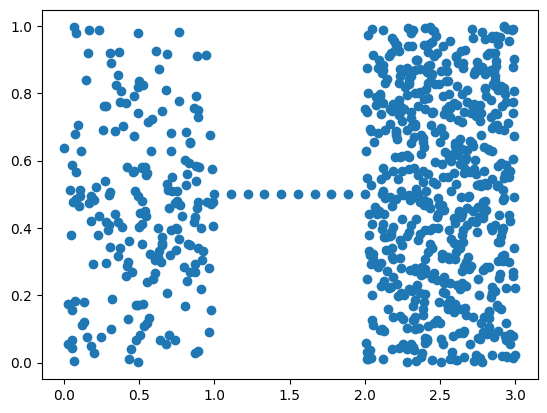

In [6]:
plt.scatter(X[:, 0], X[:, 1]);
plt.show()

In [7]:
coreset_spatial = bal.coreset_dijkstras(G, .5, data = X, density_info = (False, .15, 1.0), initial=list(train_ind));
print("Coreset = ", coreset_spatial)

Coreset =  [510, 750, 584, 335, 787, 552, 288, 293, 431, 225, 738, 559, 582, 315, 206, 632, 285, 203, 67, 132, 103, 108, 78, 92, 90, 181, 139, 12, 112, 172, 164, 534]


In [8]:
coreset_density = bal.coreset_dijkstras(G, .5, data = X, density_info = (True, .15, 1.0), initial=list(train_ind));
print("Coreset = ", coreset_density)

Coreset =  [510, 637, 568, 571, 517, 670, 687, 752, 735, 748, 270, 284, 788, 783, 352, 283, 396, 672, 403, 229, 207, 202, 171, 59, 181, 107, 17, 82, 190]


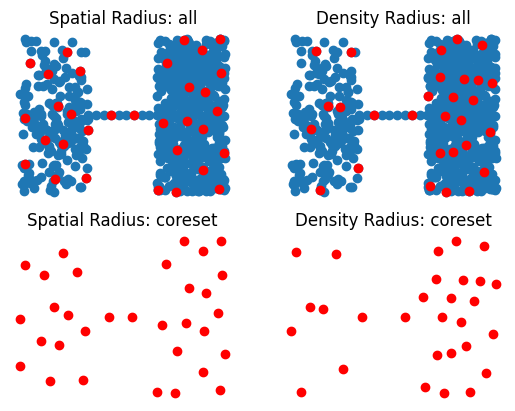

In [9]:
#Plot all of these plots together
fig_all = plt.figure()
plt.subplot(221) 
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(X[coreset_spatial, 0], X[coreset_spatial, 1], c='r')
plt.title("Spatial Radius: all")
plt.axis('off')

plt.subplot(222)
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(X[coreset_density, 0], X[coreset_density, 1], c='r')
plt.title("Density Radius: all")
plt.axis('off')

plt.subplot(223)
plt.scatter(X[coreset_spatial, 0], X[coreset_spatial, 1], c='r')
plt.title("Spatial Radius: coreset")
plt.axis('off')

plt.subplot(224)
plt.scatter(X[coreset_density, 0], X[coreset_density, 1], c='r')
plt.title("Density Radius: coreset")
plt.axis('off')

plt.savefig("BAL Examples/SimpleBatchExamples.jpg")
plt.show()

## Uniform Square dataset

In [10]:
#Used in the paper diagram
np.random.seed(0)

num_points = 1000
X = np.random.uniform(size = (num_points, 2))
W = gl.weightmatrix.knn(X, 20, kernel = 'distance')
G = gl.graph(W)
train_ind = []

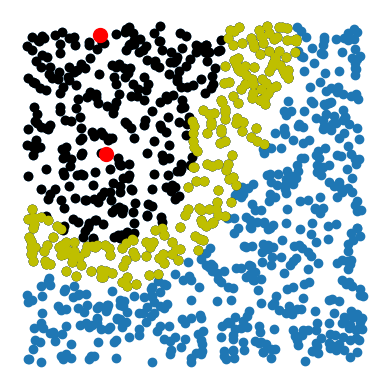

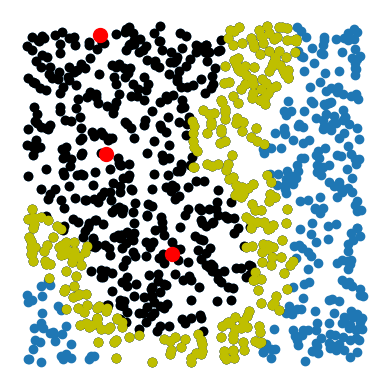

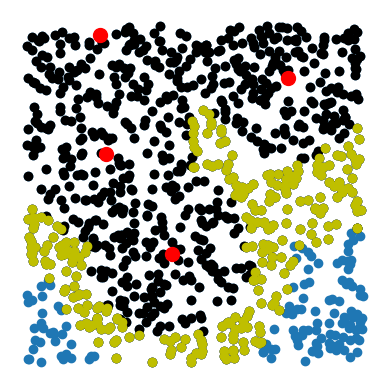

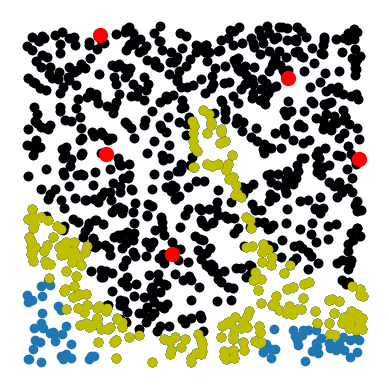

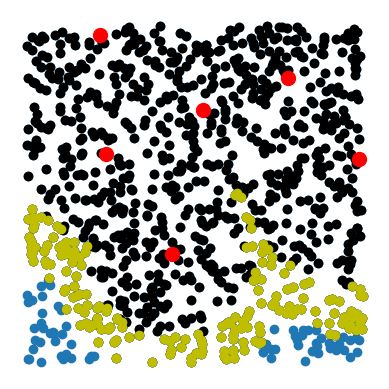

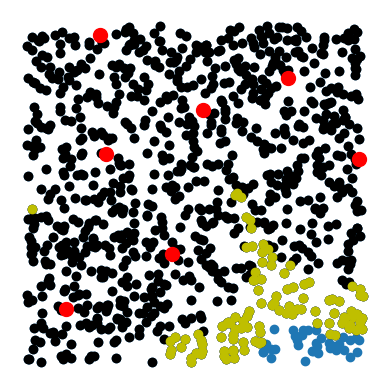

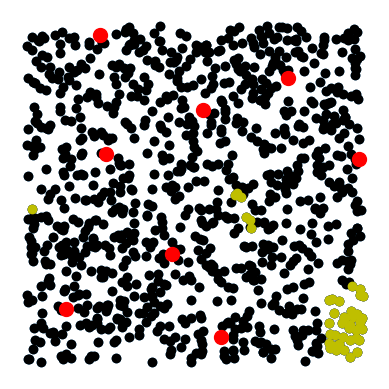

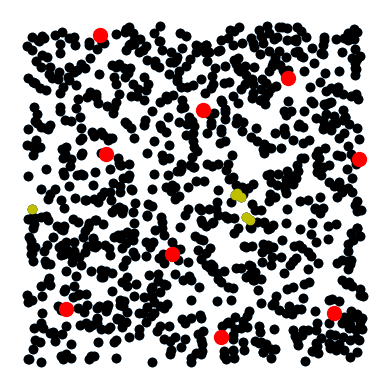

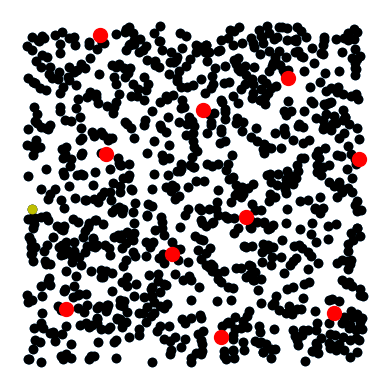

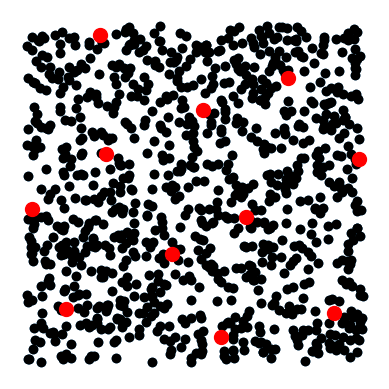

Coreset =  [510, 475, 888, 389, 563, 251, 369, 677, 799, 69, 968]


In [11]:
coreset = bal.coreset_dijkstras(G, .5, data = X, density_info = (True, .4, 1.0), initial=list(train_ind), plot_steps=True);
print("Coreset = ", coreset)